In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
from pathlib import Path

In [2]:
# Import CSV
file_path = Path('../Resources/Revised_CSV/hall_pitching.csv')
hall_pitcher_df = pd.read_csv(file_path)
hall_pitcher_df

,playerID,W,L,G,GS,CG,SHO,SV,H,ER,...,WP,HBP,BFP,R,IP,Win Percentage,Strikeout to Walk,WHIP,ERA_corrected,inducted
0,aardsda01,16.0,18.0,331.0,0.0,0.0,0.0,69.0,296.0,160.0,...,12.0,16.0,1475.0,169.0,337.000000,0.470588,1.857923,1.421365,4.272997,N
1,aasedo01,66.0,60.0,448.0,91.0,22.0,5.0,82.0,1085.0,468.0,...,22.0,7.0,4730.0,503.0,1109.333333,0.523810,1.402626,1.390024,3.796875,N
2,abadfe01,8.0,29.0,384.0,6.0,0.0,0.0,2.0,309.0,135.0,...,10.0,12.0,1399.0,143.0,330.666667,0.216216,2.413793,1.285282,3.674395,N
3,abbeybe01,22.0,40.0,79.0,65.0,52.0,0.0,1.0,686.0,285.0,...,18.0,26.0,2568.0,442.0,568.000000,0.354839,0.838542,1.545775,4.515845,N
4,abbotda01,0.0,2.0,3.0,1.0,1.0,0.0,1.0,19.0,9.0,...,3.0,1.0,67.0,14.0,13.000000,0.000000,0.125000,2.076923,6.230769,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9288,zuberbi01,43.0,42.0,224.0,65.0,23.0,3.0,6.0,767.0,374.0,...,28.0,4.0,3476.0,418.0,786.000000,0.505882,0.818376,1.571247,4.282443,N
9289,zuberty01,1.0,2.0,23.0,0.0,0.0,0.0,0.0,15.0,10.0,...,1.0,1.0,99.0,11.0,22.000000,0.333333,1.500000,1.590909,4.090909,N
9290,zumayjo01,13.0,12.0,171.0,0.0,0.0,0.0,5.0,169.0,71.0,...,16.0,4.0,911.0,80.0,209.666667,0.520000,1.842105,1.349762,3.047695,N
9291,zuverge01,32.0,36.0,265.0,31.0,9.0,2.0,40.0,660.0,253.0,...,10.0,27.0,2746.0,296.0,642.333333,0.470588,1.098522,1.343539,3.544888,N


In [3]:
# Create correlation matrix of pitching features
p_corr_matrix = hall_pitcher_df.corr()
print(p_corr_matrix)

                          W         L         G        GS        CG       SHO  \
W                  1.000000  0.953833  0.732420  0.956227  0.797673  0.864939   
L                  0.953833  1.000000  0.754156  0.950221  0.763598  0.804864   
G                  0.732420  0.754156  1.000000  0.601048  0.419668  0.496991   
GS                 0.956227  0.950221  0.601048  1.000000  0.743492  0.835244   
CG                 0.797673  0.763598  0.419668  0.743492  1.000000  0.849030   
SHO                0.864939  0.804864  0.496991  0.835244  0.849030  1.000000   
SV                 0.197484  0.215932  0.590456  0.035512  0.027357  0.042758   
H                  0.978855  0.984946  0.739831  0.962017  0.798836  0.829545   
ER                 0.956803  0.981449  0.753031  0.960270  0.716231  0.769458   
HR                 0.822192  0.840317  0.724190  0.855961  0.394492  0.582294   
BB                 0.926859  0.949258  0.762694  0.915481  0.692193  0.768450   
SO                 0.917043 

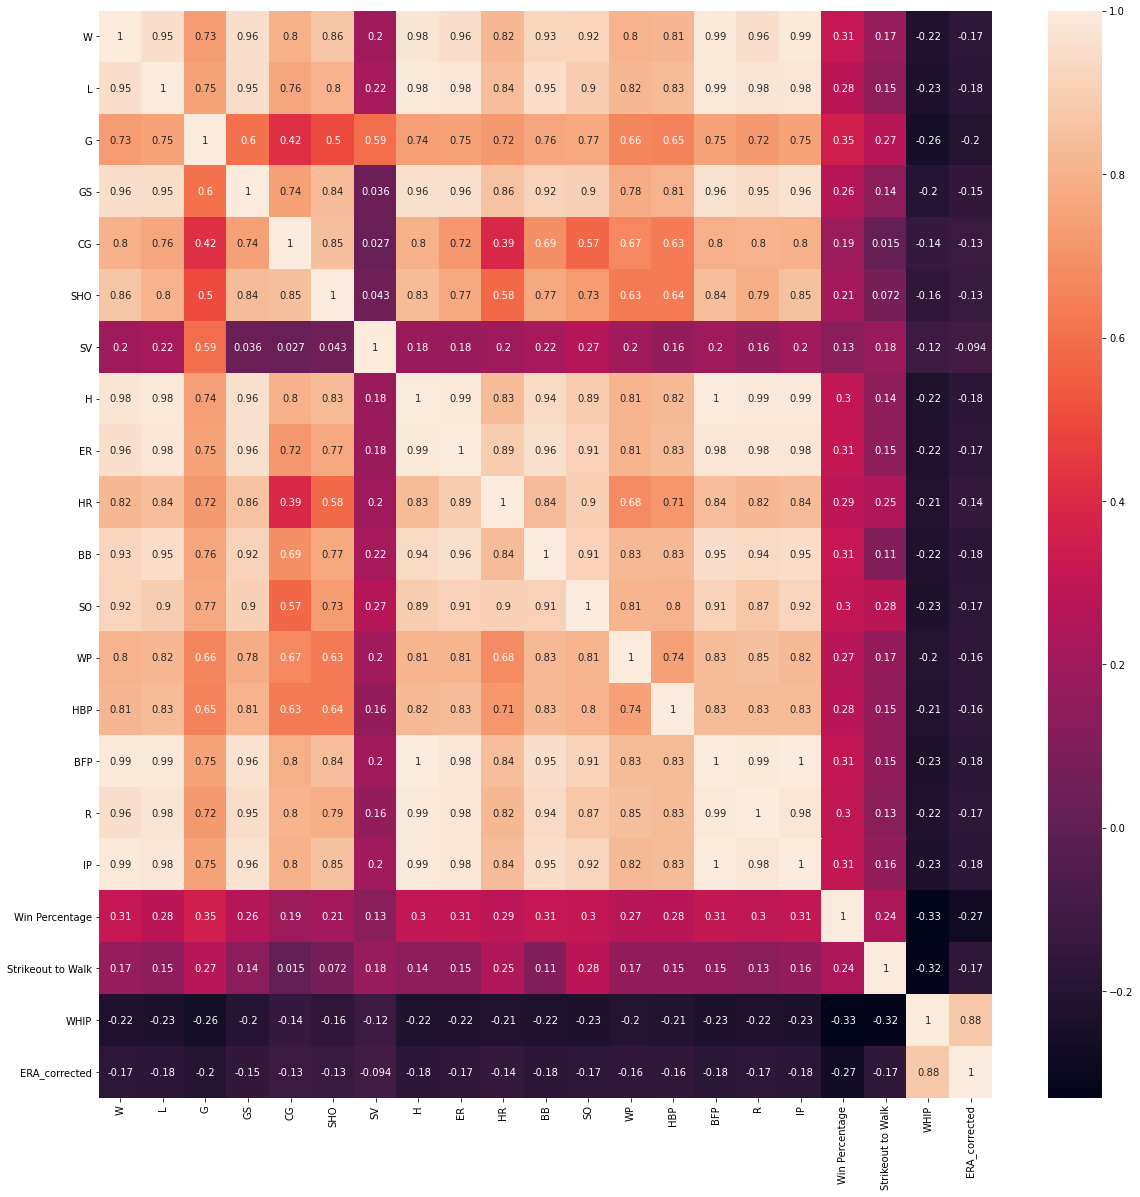

In [4]:
# Visualize correlation of features and save as PDF

import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
sn.heatmap(p_corr_matrix, annot=True)
plt.savefig("../Resources/pitching_corr.pdf")
plt.show()

In [5]:
# Import CSV
file_path = Path('../Resources/Revised_CSV/hall_batter.csv')
hall_batter_df = pd.read_csv(file_path)
hall_batter_df

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,AVG,OBP,SLG,inducted
0,aardsda01,331.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,N
1,aaronha01,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,240.0,1402.0,1383.0,32.0,21.0,121.0,0.304998,0.373949,0.554513,Y
2,aaronto01,437.0,944.0,102.0,216.0,42.0,6.0,13.0,94.0,9.0,86.0,145.0,0.0,9.0,6.0,0.228814,0.291506,0.327331,N
3,aasedo01,448.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,N
4,abadan01,15.0,21.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.095238,0.240000,0.095238,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,zupcibo01,319.0,795.0,99.0,199.0,47.0,4.0,7.0,80.0,7.0,57.0,137.0,6.0,20.0,8.0,0.250314,0.302540,0.345912,N
17502,zupofr01,16.0,18.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.166667,0.250000,0.222222,N
17503,zuvelpa01,209.0,491.0,41.0,109.0,17.0,2.0,2.0,20.0,2.0,34.0,50.0,2.0,18.0,0.0,0.221996,0.275142,0.276986,N
17504,zuverge01,266.0,142.0,5.0,21.0,2.0,1.0,0.0,7.0,0.0,9.0,39.0,0.0,16.0,0.0,0.147887,0.198675,0.176056,N


In [6]:
# Create correlation matrix of pitching features
b_corr_matrix = hall_batter_df.corr()
print(b_corr_matrix)

            G        AB         R         H        2B        3B        HR  \
G    1.000000  0.966399  0.935095  0.955640  0.938628  0.776329  0.765804   
AB   0.966399  1.000000  0.979094  0.995139  0.975885  0.827443  0.786846   
R    0.935095  0.979094  1.000000  0.985883  0.968794  0.852781  0.799760   
H    0.955640  0.995139  0.985883  1.000000  0.982020  0.845424  0.784908   
2B   0.938628  0.975885  0.968794  0.982020  1.000000  0.795246  0.823863   
3B   0.776329  0.827443  0.852781  0.845424  0.795246  1.000000  0.482346   
HR   0.765804  0.786846  0.799760  0.784908  0.823863  0.482346  1.000000   
RBI  0.924241  0.960701  0.962322  0.966730  0.971049  0.781560  0.886587   
SB   0.658469  0.706151  0.752292  0.713365  0.654226  0.768619  0.388340   
BB   0.901781  0.925020  0.943728  0.924335  0.919189  0.739420  0.828936   
SO   0.862025  0.866246  0.838984  0.841260  0.863840  0.566572  0.884864   
HBP  0.734451  0.763647  0.768332  0.760614  0.763817  0.611503  0.649226   

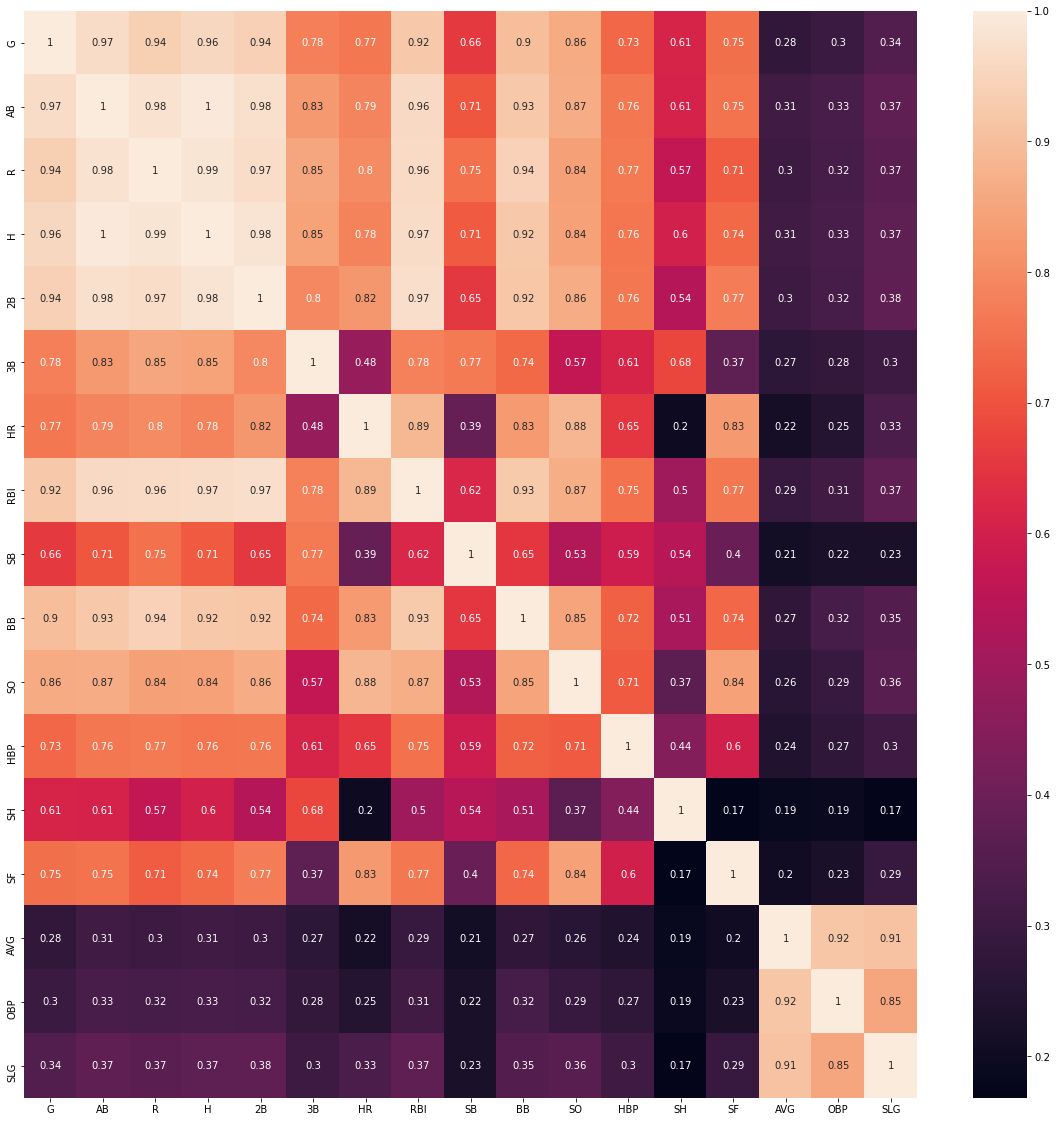

In [7]:
# Visualize correlation of features and save as PDF

import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
sn.heatmap(b_corr_matrix, annot=True)
plt.savefig("../Resources/batting_corr.pdf")
plt.show()